<a href="https://colab.research.google.com/github/Riccalder/CPE-019/blob/main/Calderon_Hands_on_Activity_1_2_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***NAME***: CALDERON RICARDO B.

***COURSE&SECTION***: CPE019-CPE019S9

***INSTRUCTURE***: ENGR. ROMAN RICHARD

***DATE PERFORMED***: APRIL 08, 2024

***DATE SUBMETTED***: APRIL 09, 2024




# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "/content/drive/MyDrive/CPE019/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
733,2,106,56,27,165,29.0,0.426,22,0
543,4,84,90,23,56,39.5,0.159,25,0
247,0,165,90,33,680,52.3,0.427,23,0
356,1,125,50,40,167,33.3,0.962,28,1
189,5,139,80,35,160,31.6,0.361,25,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 17ms/step - loss: 0.6663 - accuracy: 0.6562 - val_loss: 0.5998 - val_accuracy: 0.6771
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6719 - val_loss: 0.5878 - val_accuracy: 0.7031
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6875 - val_loss: 0.5781 - val_accuracy: 0.7135
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6199 - accuracy: 0.6979 - val_loss: 0.5701 - val_accuracy: 0.7240
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6091 - accuracy: 0.7014 - val_loss: 0.5633 - val_accuracy: 0.7292
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.6997 - val_loss: 0.5576 - val_accuracy: 0.7500
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5918 - accuracy: 0.6997 - val_loss: 0.5525 - val_accuracy: 0.7552
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = (y_pred_prob_nn_1 > 0.5).astype(int)

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.40532732],
       [0.76059324],
       [0.22742514],
       [0.19866107],
       [0.16644475],
       [0.53475183],
       [0.02155078],
       [0.40539536],
       [0.9501388 ],
       [0.17049696]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.821


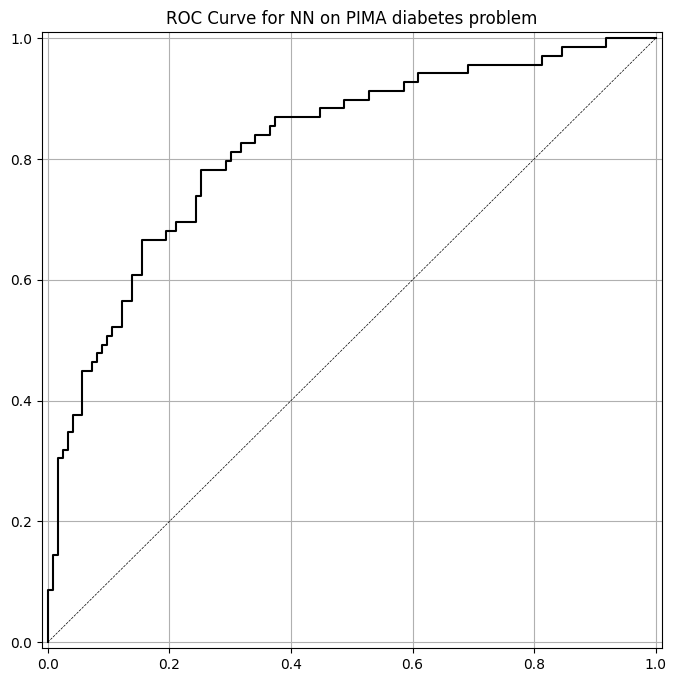

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

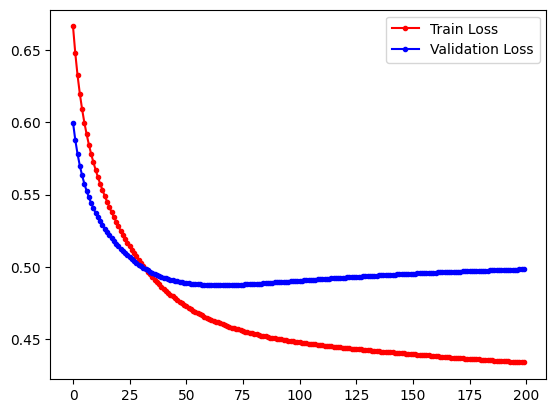

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

**According to the chart, a decrease in train loss shows improvement in the model's ability to learn from the training data. However, if the validation part shows no improvement or even a decline, it suggests that the model is not performing well with new and unseen data.**

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
# Define the model with two hidden layers
model_2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model with the specified optimizer, loss function, and metrics
model_2.compile(SGD(lr=0.003), "binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Train the model for 1500 epochs
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500, verbose=0)

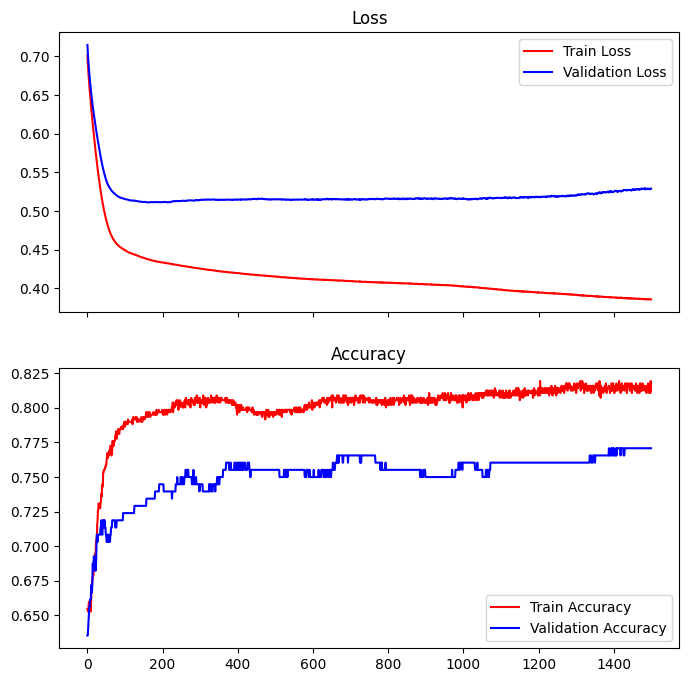

In [ ]:
# Plot the trajectory of loss functions and accuracy
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 8))
ax1.set_title("Loss")
ax1.plot(run_hist_2.history["loss"], "r", label="Train Loss")
ax1.plot(run_hist_2.history["val_loss"], "b", label="Validation Loss")
ax1.legend()
ax2.set_title("Accuracy")
ax2.plot(run_hist_2.history["accuracy"], "r", label="Train Accuracy")
ax2.plot(run_hist_2.history["val_accuracy"], "b", label="Validation Accuracy")
ax2.legend()

6/6 [==============================] - 0s 3ms/step


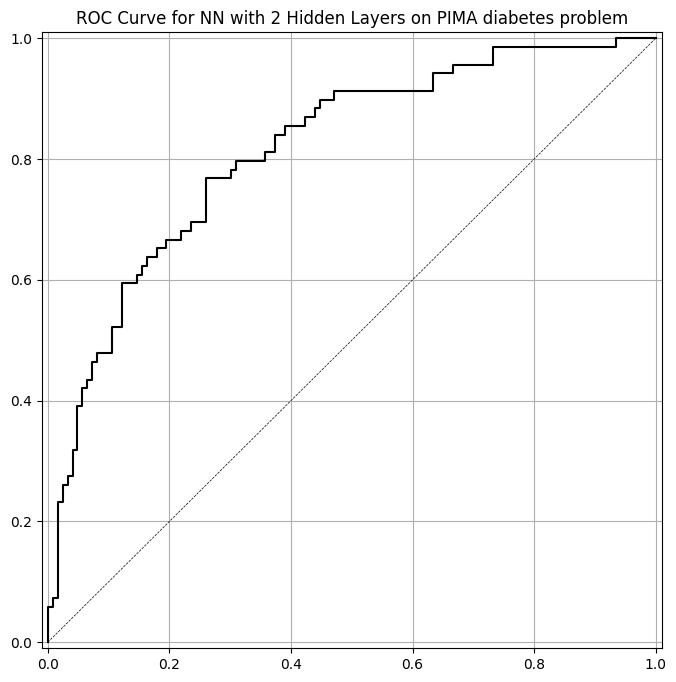

In [ ]:
# Plot the ROC curve for predictions
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
plot_roc(y_test, y_pred_prob_nn_2, 'NN with 2 Hidden Layers')

In [ ]:
# Define the model with three hidden layers
model_3 = Sequential([
    Dense(5, input_shape=(8,), activation="relu"),
    Dense(5, activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model with the specified optimizer, loss function, and metrics
model_3.compile(SGD(lr=0.005), "binary_crossentropy", metrics=["accuracy"])

In [ ]:
# Train the model for 1000 epochs
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000, verbose=0)

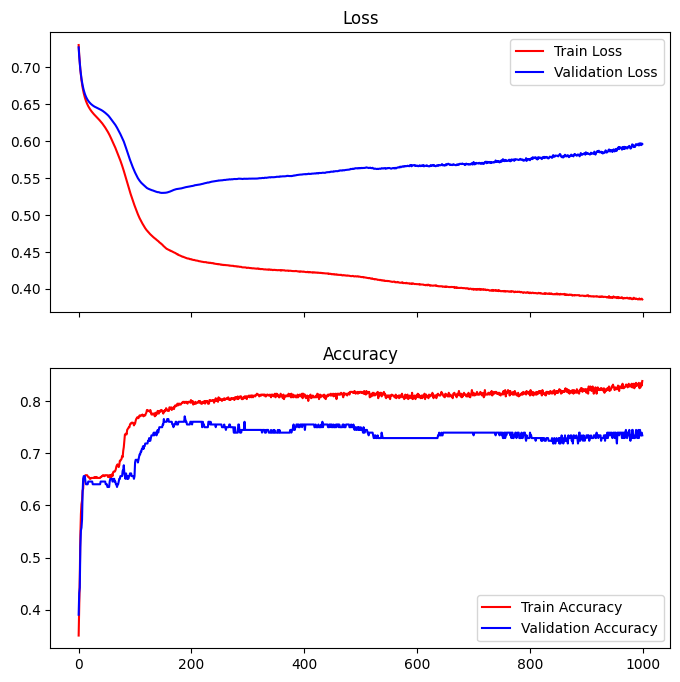

In [ ]:
# Plot the trajectory of loss functions and accuracy
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 8))
ax1.set_title("Loss")
ax1.plot(run_hist_3.history["loss"], "r", label="Train Loss")
ax1.plot(run_hist_3.history["val_loss"], "b", label="Validation Loss")
ax1.legend()
ax2.set_title("Accuracy")
ax2.plot(run_hist_3.history["accuracy"], "r", label="Train Accuracy")
ax2.plot(run_hist_3.history["val_accuracy"], "b", label="Validation Accuracy")
ax2.legend()

6/6 [==============================] - 0s 2ms/step


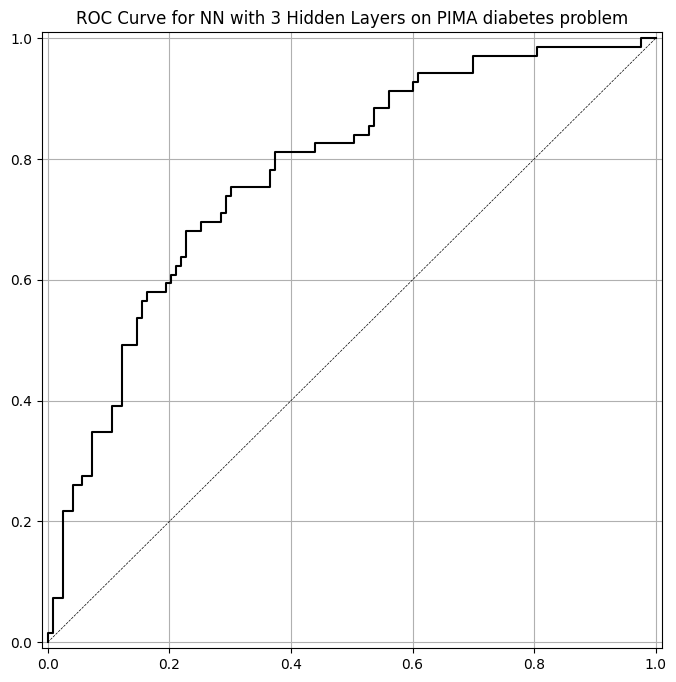

In [ ]:
# Plot the ROC curve for predictions
y_pred_prob_nn_3 = model_3.predict(X_test_norm)
plot_roc(y_test, y_pred_prob_nn_3, 'NN with 3 Hidden Layers')

#### Conclusion

*****In this activity, we demonstrated how to build training neural networks, through visual analysis of the plots and comparison of model performance, you can gain valuable insights into the behavior and effectiveness of your neural network models for the given task. Adjustments and further experimentation can help improve their performance and address any observed issues.*****